<h1 align="center"> Assignment - 5 (ANN) </h1>

<h2 align="left"> Neural network using Keras </h2> 
<h4 align="right" > 
    Author: <a href="https://jimut123.github.io/">Jimut Bahan Pal </a>
</h4> 

#### Question
***
Import the Iris dataset and divide the data into training and test datasets.

a) Train a 2-layered neural network (1 hidden layer) model on the data. Employ Batch normalization and initialize the weights using the Xaviers method with normal distribution. Make predictions on the test data and compute the accuracy.

b) Vary the number of neurons in the hidden layer and show the impact on accuracy.

c) Take (one of) the case which has best accuracy and employ dropout with different values of dropout rate (say from 0.1 to 0.7). Plot the variation of accuracy versus dropout rate.

d) Now increase the number of hidden layers (with same no. of neurons) and show the variation of accuracy with respect to the number of hidden layers. You can select the number of neurons as determined best in part b)

e) Using the setting as determined best in part b), train the model with a few different optimization algorithms (with default settings) and print the accuracy from each case. You may try adam, adagrad, adadelta.

Hint (python):
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Loading the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,Adam
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model  #plotting the model structure

Using TensorFlow backend.


## Loading the iris data

In [2]:
iris = datasets.load_iris()
X_data = iris.data[:,0:4].astype(float)  # 4-features
Y_data = iris.target # labels (3 classes)

In [3]:
encoder = LabelEncoder()

In [4]:
encoder.fit(Y_data)

LabelEncoder()

In [5]:
encoded_Y = encoder.transform(Y_data)

In [6]:
dummy_y = np_utils.to_categorical(encoded_Y)

## Dividing the data into training and test dataset

In [7]:
#dummy_y
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_data, dummy_y,
    test_size=0.2, shuffle = True, random_state = 123)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120, 3)
y_test shape: (30, 3)


In [8]:
print(X_train[:10])

[[7.4 2.8 6.1 1.9]
 [6.  2.2 5.  1.5]
 [4.7 3.2 1.6 0.2]
 [5.1 3.5 1.4 0.2]
 [6.  2.2 4.  1. ]
 [5.  2.3 3.3 1. ]
 [7.9 3.8 6.4 2. ]
 [5.4 3.9 1.7 0.4]
 [5.4 3.9 1.3 0.4]
 [5.8 2.7 3.9 1.2]]


In [9]:
# get reproducible results:: 99.17%
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0
import tensorflow as tf
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)


# for later versions:
# session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# tf.compat.v1.keras.backend.set_session(sess)

## a)
### Train a 2-layered neural network (1 hidden layer) model on the data.
### Employ Batch normalization and initialize the weights using the Xaviers method with normal distribution. 
### Make predictions on the test data and compute the accuracy.

In [10]:
#Defining the model 

# Seq approach
model = Sequential()
# input dimension is 4 since there are 4 features (input layer)
model.add(Dense(4, input_dim=4, activation='softmax'))
# 1st hidden layer
# initialising the weights using Xavier's Method
model.add(Dense(10, activation='softmax',kernel_initializer = 'glorot_normal'))
model.add(BatchNormalization())
# 2nd layer is output layer
model.add(Dense(3, activation='softmax'))
# output layer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 143
Trainable params: 123
Non-trainable params: 20
_________________________________________________________________


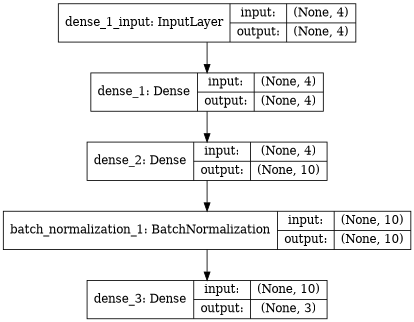

In [11]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=60)

In [12]:
#fitting the model and predicting 
hist = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
120/120 [==============================] - 3s 29ms/step - loss: 1.1122 - accuracy: 0.2583
Epoch 2/100
120/120 [==============================] - 0s 843us/step - loss: 1.1089 - accuracy: 0.2583
Epoch 3/100
120/120 [==============================] - 0s 224us/step - loss: 1.1058 - accuracy: 0.2917
Epoch 4/100
120/120 [==============================] - 0s 306us/step - loss: 1.1036 - accuracy: 0.3250
Epoch 5/100
120/120 [==============================] - 0s 839us/step - loss: 1.1018 - accuracy: 0.3333
Epoch 6/100
120/120 [==============================] - 0s 542us/step - loss: 1.0998 - accuracy: 0.3583
Epoch 7/100
120/120 [==============================] - 0s 317us/step - loss: 1.0984 - accuracy: 0.3583
Epoch 8/100
120/120 [==============================] - 0s 193us/step - loss: 1.0973 - accuracy: 0.3583
Epoch 9/100
120/120 [==============================] - 0s 425us/step - loss: 1.0962 - accuracy: 0.3583
Epoch 10/100
120/120 [==============================] - ETA: 0s - loss: 1.

120/120 [==============================] - 0s 434us/step - loss: 0.4048 - accuracy: 0.8583
Epoch 80/100
120/120 [==============================] - 0s 339us/step - loss: 0.4012 - accuracy: 0.8667
Epoch 81/100
120/120 [==============================] - 0s 269us/step - loss: 0.3903 - accuracy: 0.8667
Epoch 82/100
120/120 [==============================] - 0s 292us/step - loss: 0.4045 - accuracy: 0.8583
Epoch 83/100
120/120 [==============================] - 0s 279us/step - loss: 0.3863 - accuracy: 0.8833
Epoch 84/100
120/120 [==============================] - 0s 254us/step - loss: 0.4151 - accuracy: 0.8417
Epoch 85/100
120/120 [==============================] - 0s 271us/step - loss: 0.3861 - accuracy: 0.8667
Epoch 86/100
120/120 [==============================] - 0s 268us/step - loss: 0.3746 - accuracy: 0.9167
Epoch 87/100
120/120 [==============================] - 0s 480us/step - loss: 0.3541 - accuracy: 0.8667
Epoch 88/100
120/120 [==============================] - 0s 359us/step - loss:

In [17]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy'])


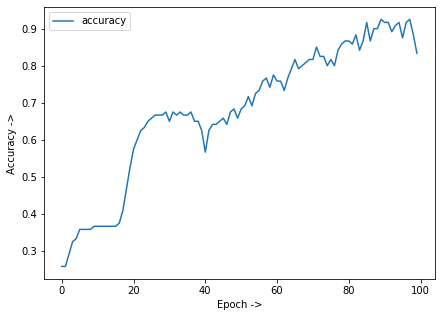

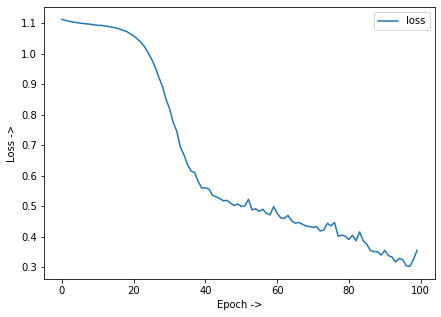

In [18]:

plt.figure(figsize=(7,5))
legend_acc = []
for item in hist.history.keys():
    if item.split('_')[-1:] == ['accuracy']:
        #print("Accuracy = ",item)
        legend_acc.append(item)
        plt.plot(hist.history[item])
plt.ylabel('Accuracy ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper left')
plt.show()

plt.figure(figsize=(7,5))
legend_acc = []
for item in hist.history.keys():
    if item.split('_')[-1:] == ['loss']:
        #print("Accuracy = ",item)
        legend_acc.append(item)
        plt.plot(hist.history[item])
plt.ylabel('Loss ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper right')
plt.show()

In [19]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [20]:
print(y_pred)
print(y_test_class)
print(y_pred_class)

[[0.09890788 0.64731497 0.2537772 ]
 [0.04914845 0.58929026 0.36156127]
 [0.03867501 0.5637737  0.3975513 ]
 [0.11557894 0.6496424  0.23477863]
 [0.6503627  0.31497464 0.03466271]
 [0.06067329 0.61122406 0.32810265]
 [0.19335772 0.6398732  0.16676906]
 [0.62054306 0.34025338 0.03920352]
 [0.6223265  0.33880046 0.03887304]
 [0.1037725  0.6507972  0.24543034]
 [0.06039342 0.60723007 0.33237645]
 [0.6732332  0.29544082 0.03132604]
 [0.10907686 0.6496358  0.24128729]
 [0.04907482 0.59123677 0.35968846]
 [0.04779161 0.5852524  0.36695597]
 [0.03474224 0.5498999  0.41535786]
 [0.7077717  0.26564255 0.02658576]
 [0.656733   0.3095983  0.03366867]
 [0.09372076 0.64337194 0.26290736]
 [0.651472   0.31406128 0.03446671]
 [0.6790975  0.2904024  0.03050014]
 [0.07452545 0.630643   0.29483148]
 [0.55858576 0.3916591  0.04975515]
 [0.05973415 0.60986656 0.33039925]
 [0.62442726 0.33689493 0.03867782]
 [0.66258955 0.3045409  0.03286951]
 [0.67073905 0.29757932 0.03168161]
 [0.04395211 0.57989144 0.37

## b)
### Vary the number of neurons in the hidden layer and show the impact on accuracy.

#### Lets brute force crazily, starting from Number of Neurons in hidden layer = 4

Hidden Neurons =>  4
Accuracy =>  0.94166666


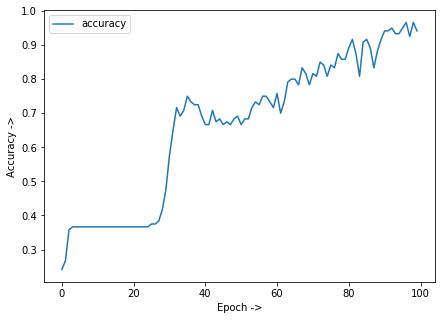

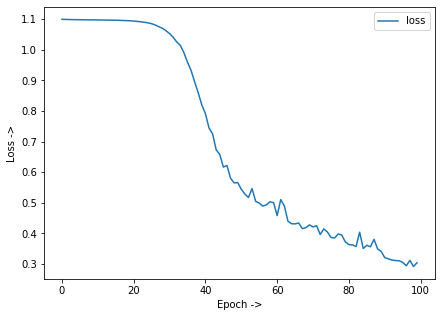

Hidden Neurons =>  5
Accuracy =>  0.98333335


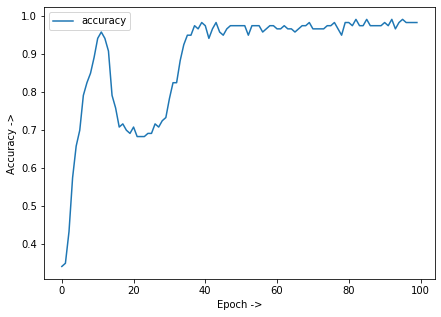

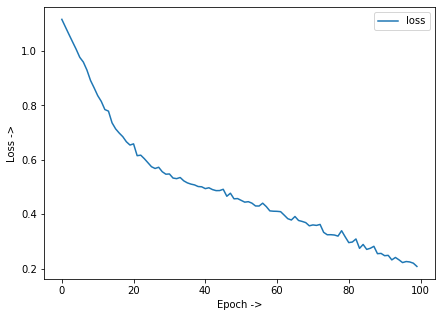

Hidden Neurons =>  6
Accuracy =>  0.9583333


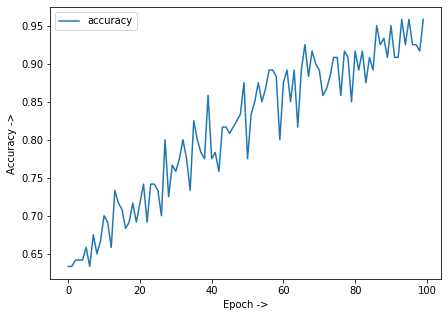

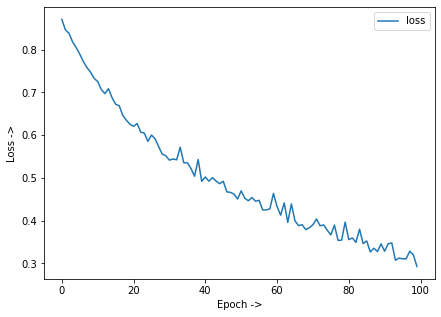

Hidden Neurons =>  7
Accuracy =>  0.90833336


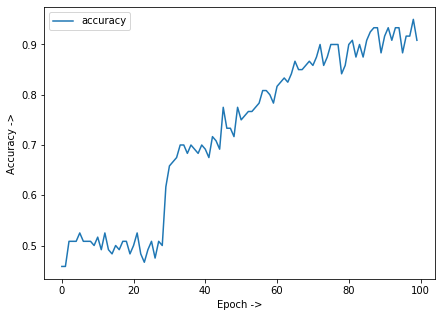

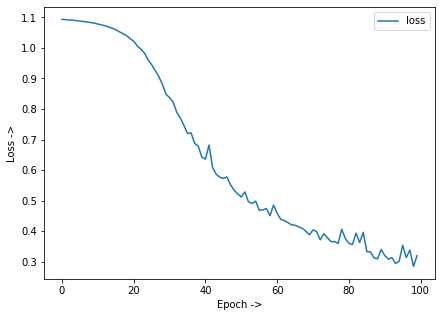

Hidden Neurons =>  8
Accuracy =>  0.94166666


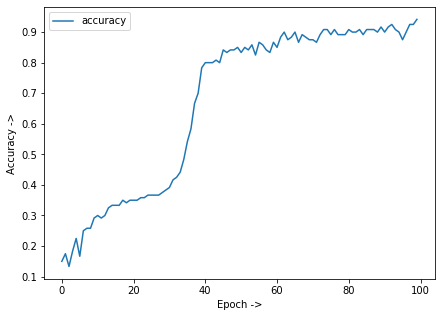

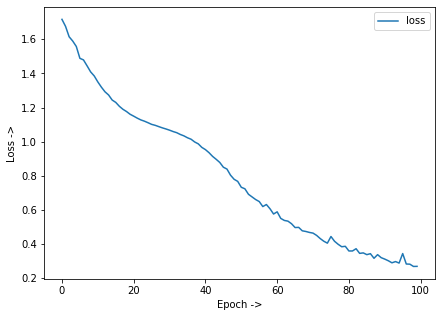

Hidden Neurons =>  9
Accuracy =>  0.9583333


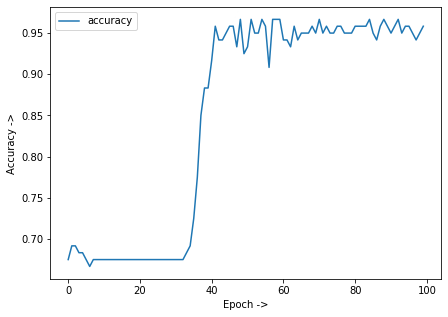

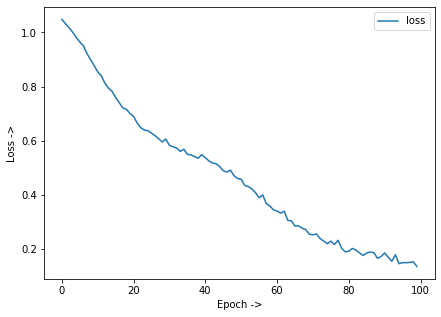

Hidden Neurons =>  10
Accuracy =>  0.925


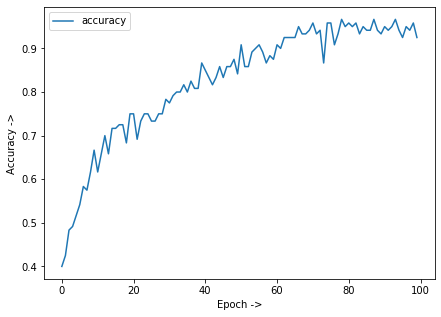

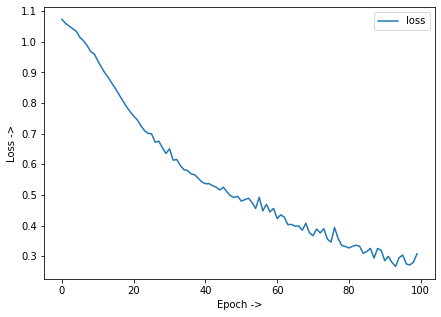

Hidden Neurons =>  11
Accuracy =>  0.98333335


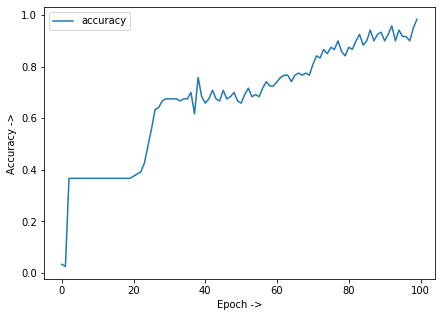

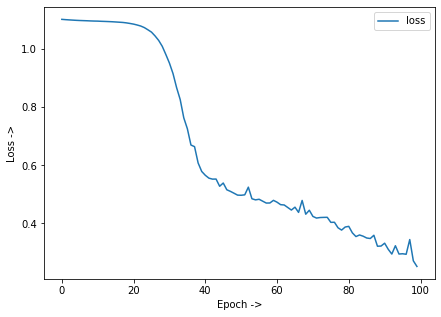

Hidden Neurons =>  12
Accuracy =>  0.9583333


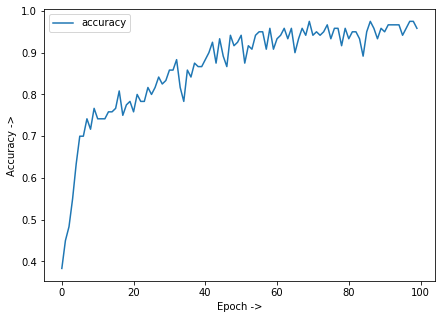

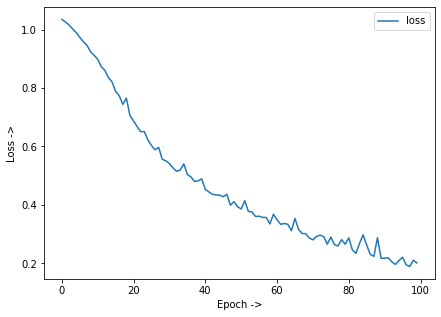

Hidden Neurons =>  13
Accuracy =>  0.9583333


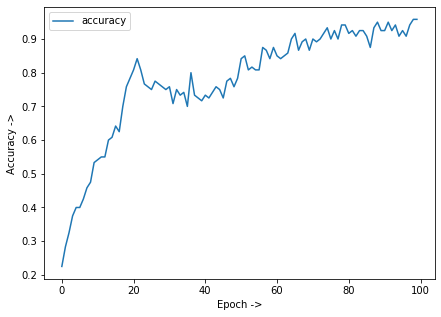

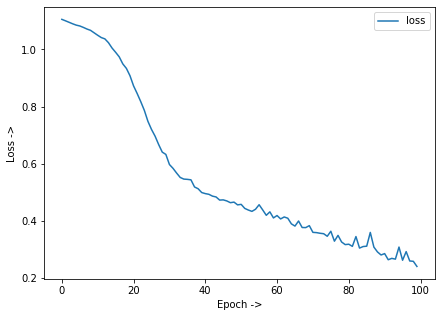

Hidden Neurons =>  14
Accuracy =>  0.9583333


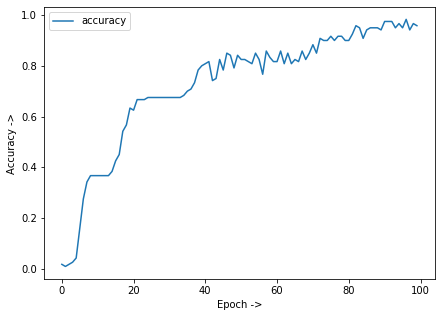

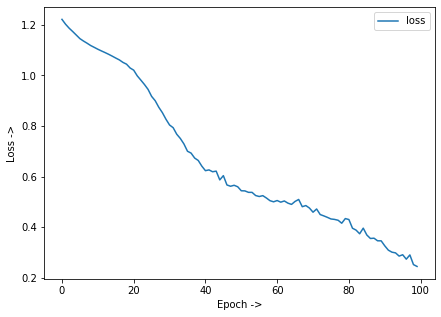

Hidden Neurons =>  15
Accuracy =>  0.975


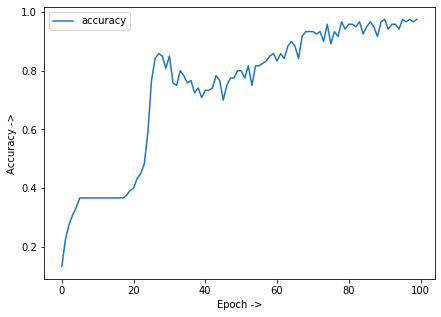

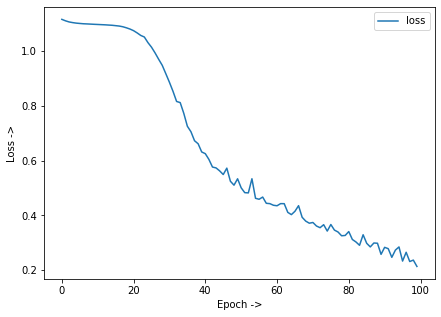

Hidden Neurons =>  16
Accuracy =>  0.95


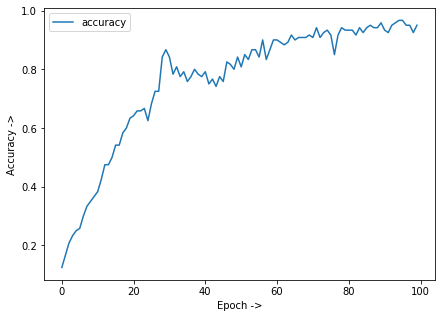

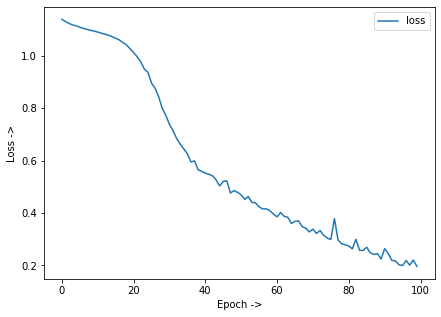

Hidden Neurons =>  17
Accuracy =>  0.9166667


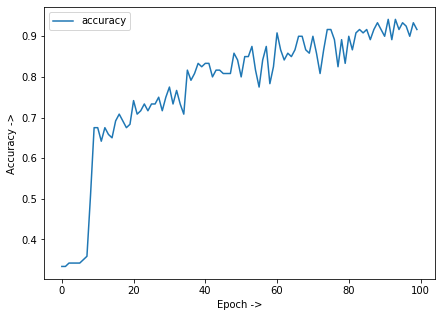

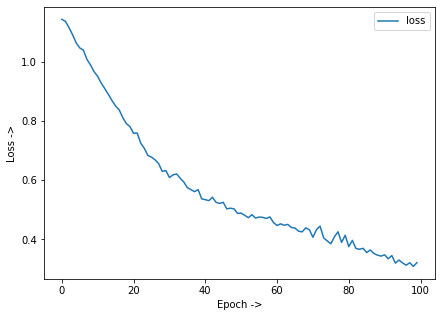

Hidden Neurons =>  18
Accuracy =>  0.9916667


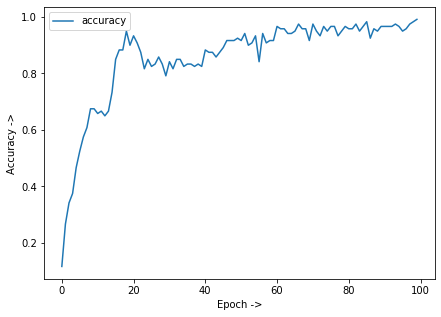

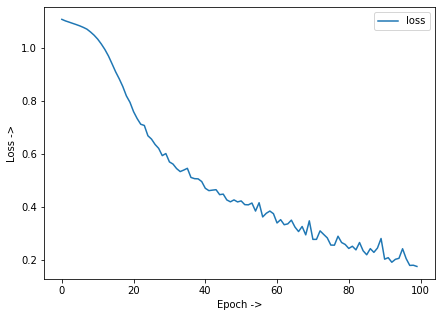

Hidden Neurons =>  19
Accuracy =>  0.94166666


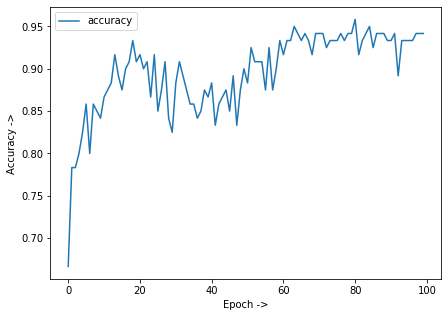

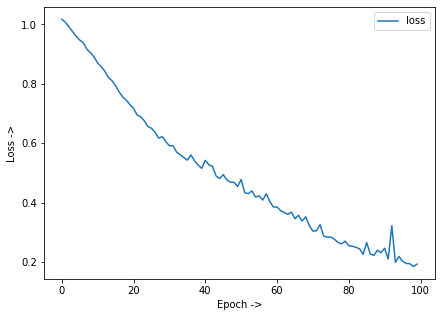

Hidden Neurons =>  20
Accuracy =>  0.975


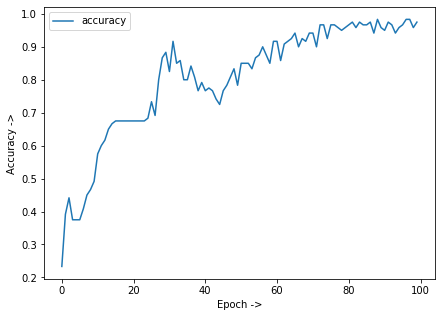

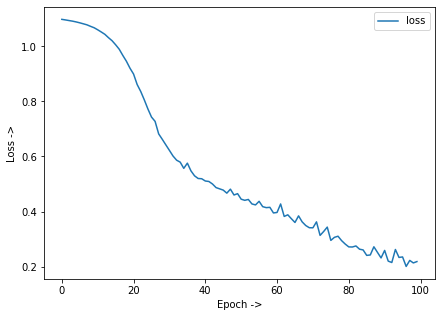

Hidden Neurons =>  21
Accuracy =>  0.975


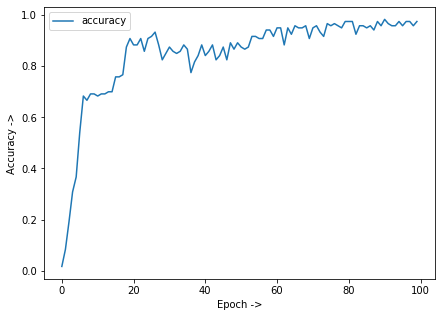

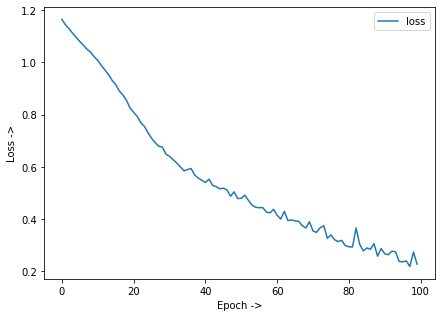

Hidden Neurons =>  22
Accuracy =>  0.98333335


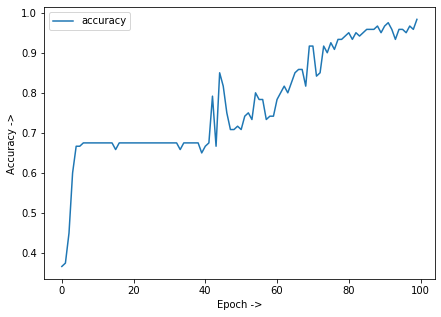

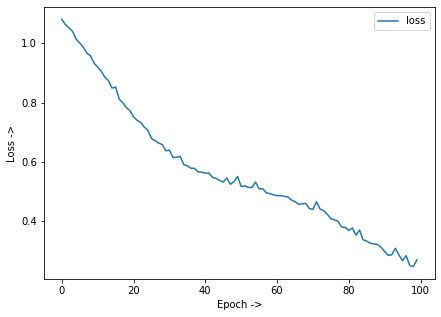

Hidden Neurons =>  23
Accuracy =>  0.9583333


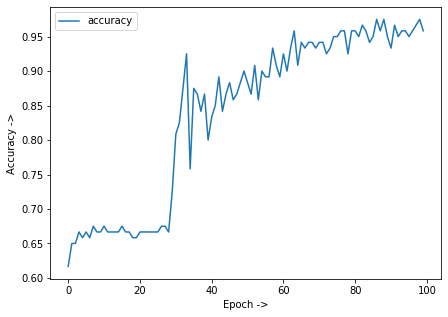

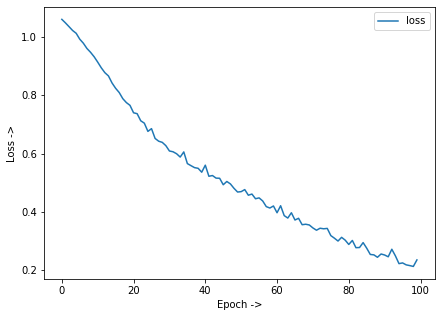

Hidden Neurons =>  24
Accuracy =>  0.975


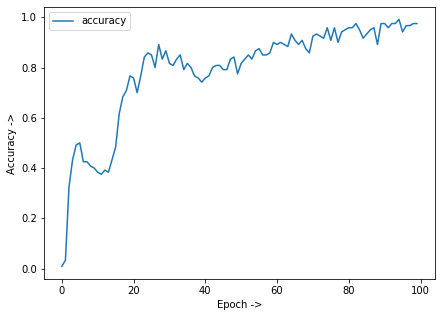

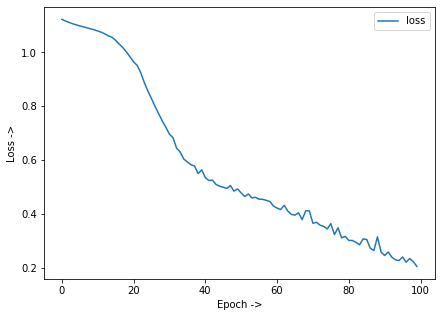

Hidden Neurons =>  25
Accuracy =>  0.9


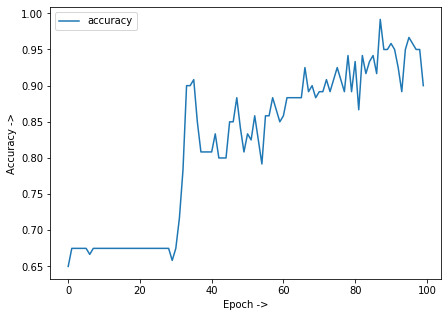

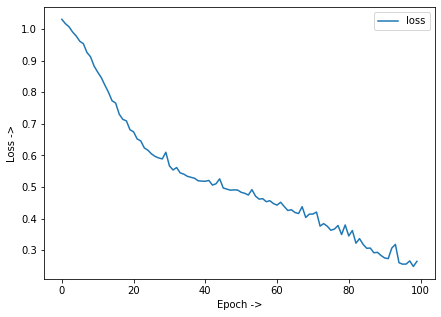

Hidden Neurons =>  26
Accuracy =>  0.975


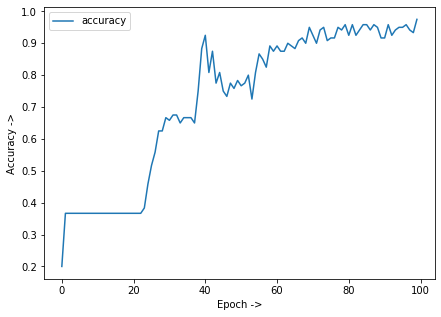

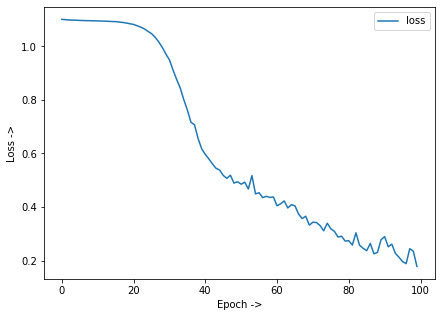

Hidden Neurons =>  27
Accuracy =>  0.9583333


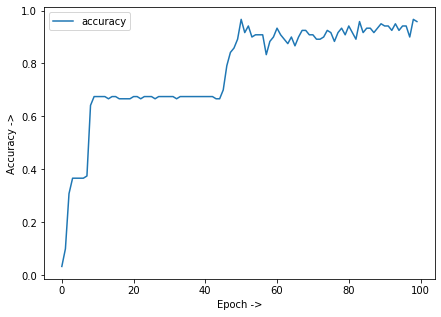

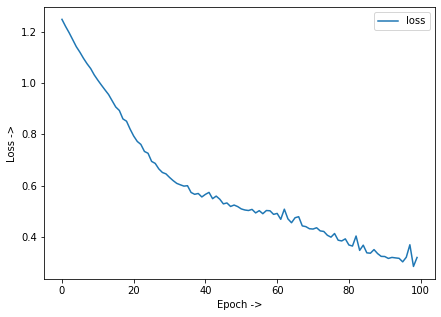

Hidden Neurons =>  28
Accuracy =>  0.96666664


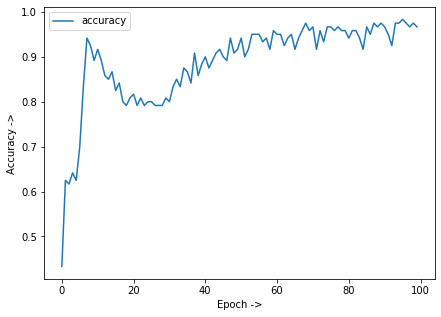

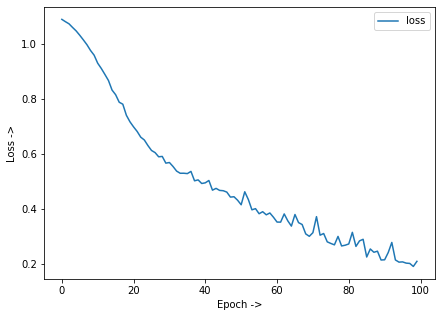

Hidden Neurons =>  29
Accuracy =>  0.9166667


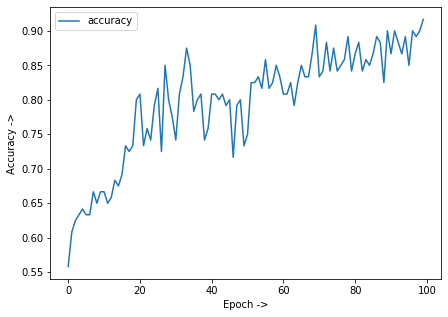

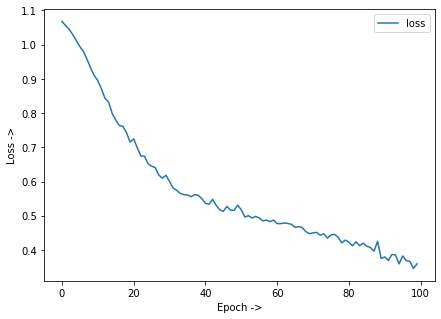

Hidden Neurons =>  30
Accuracy =>  0.95


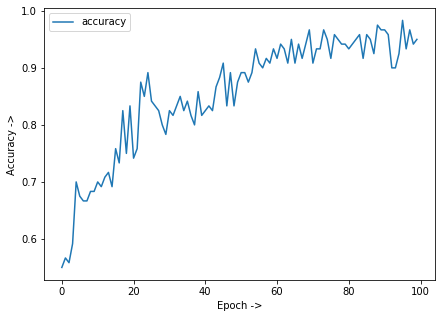

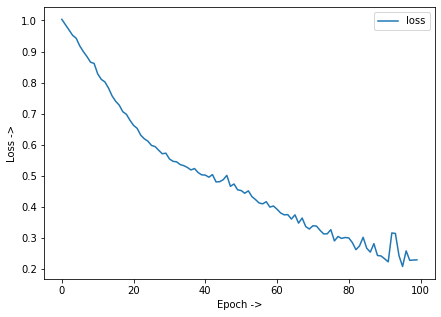

Hidden Neurons =>  31
Accuracy =>  0.975


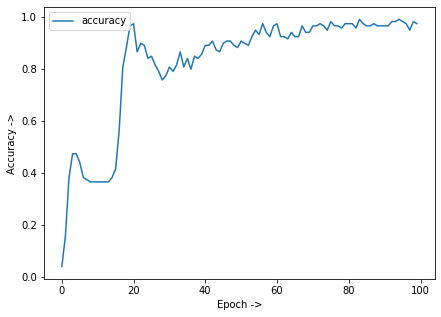

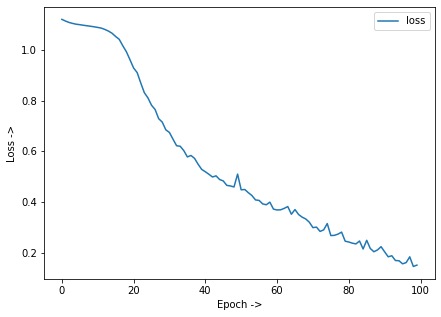

Hidden Neurons =>  32
Accuracy =>  0.95


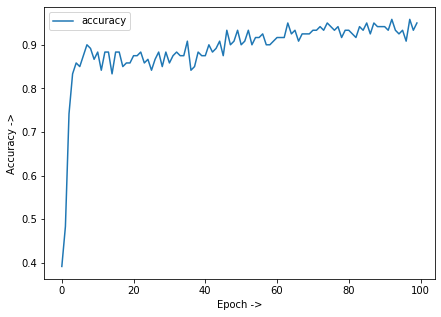

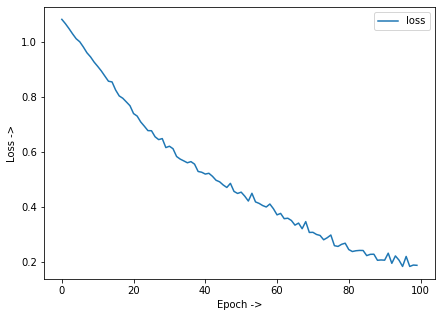

Hidden Neurons =>  33
Accuracy =>  0.90833336


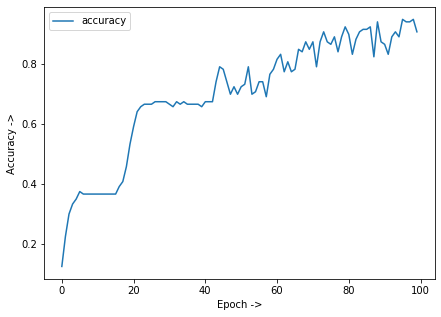

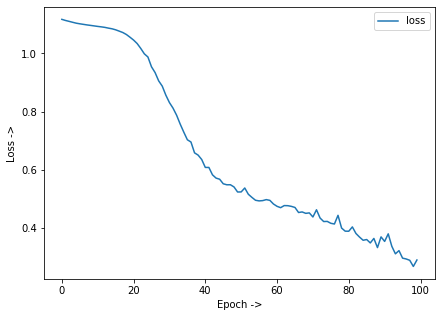

Hidden Neurons =>  34
Accuracy =>  0.9583333


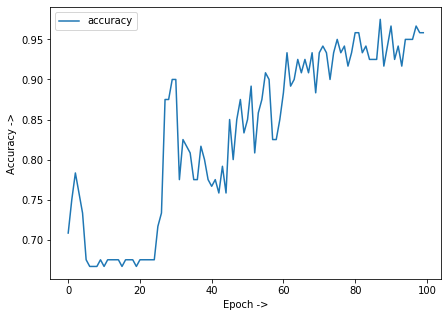

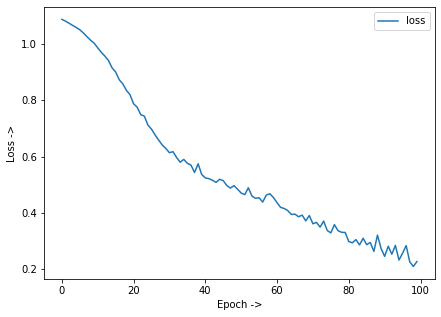

Hidden Neurons =>  35
Accuracy =>  0.95


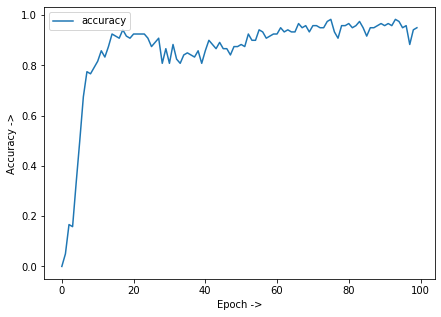

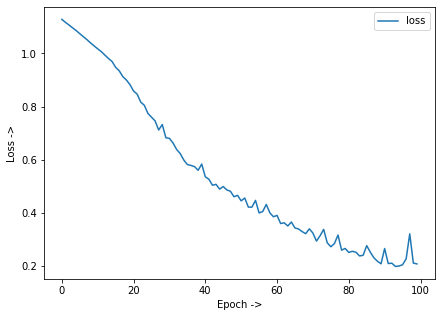

Hidden Neurons =>  36
Accuracy =>  0.98333335


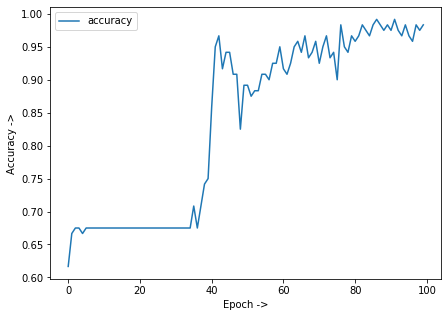

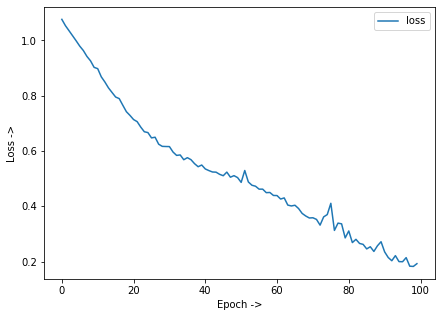

Hidden Neurons =>  37
Accuracy =>  0.94166666


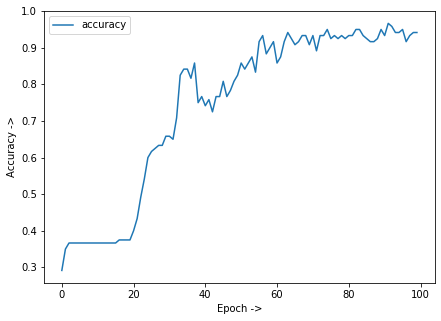

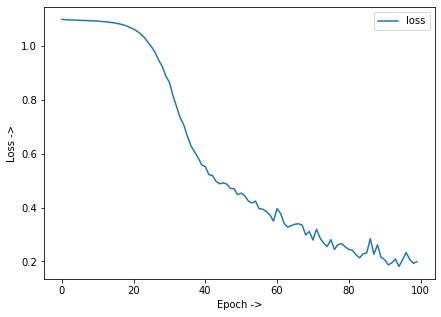

Hidden Neurons =>  38
Accuracy =>  0.95


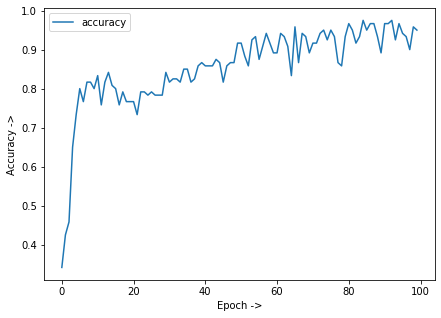

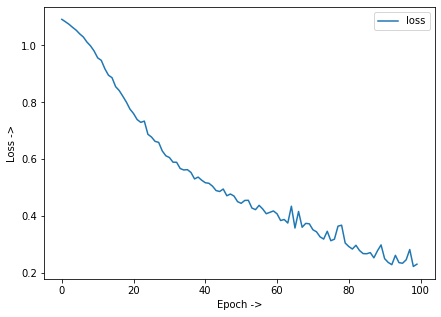

Hidden Neurons =>  39
Accuracy =>  0.9583333


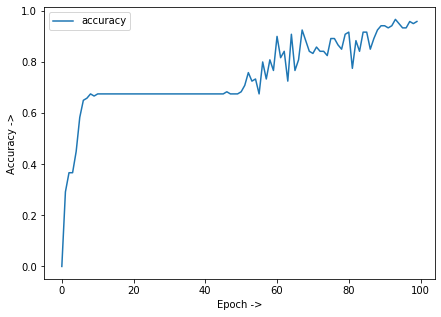

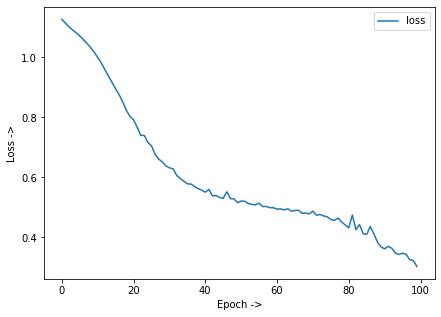

Hidden Neurons =>  40
Accuracy =>  0.9583333


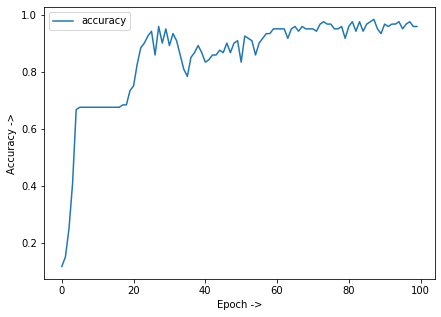

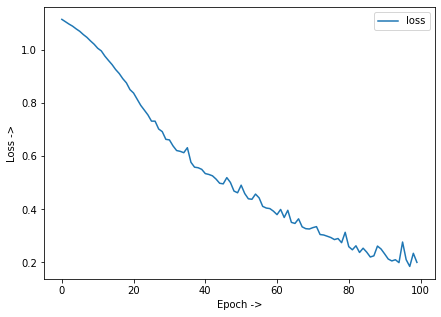

Hidden Neurons =>  41
Accuracy =>  0.94166666


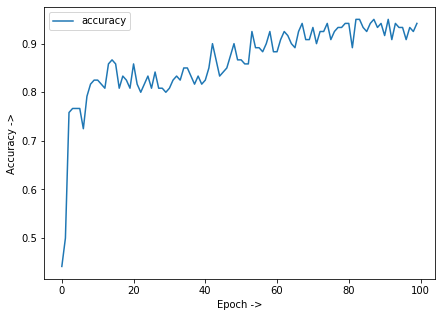

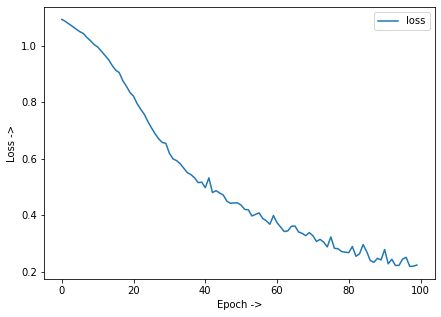

Hidden Neurons =>  42
Accuracy =>  0.925


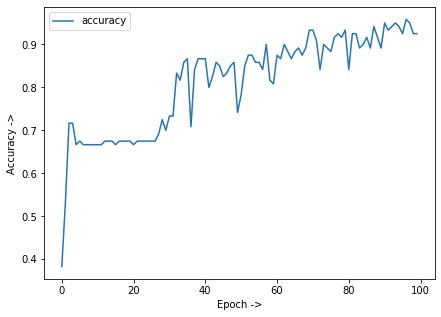

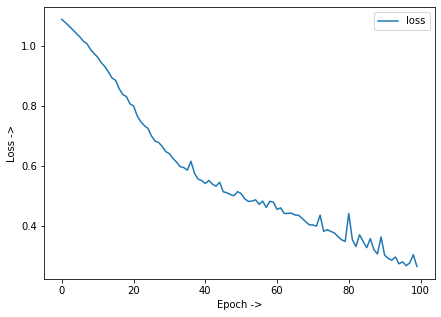

Hidden Neurons =>  43
Accuracy =>  0.975


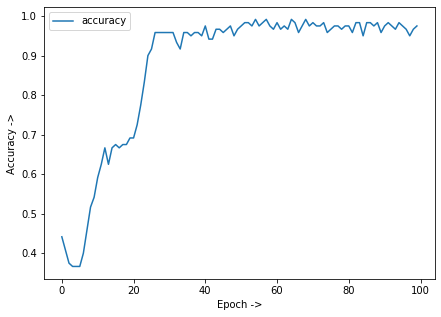

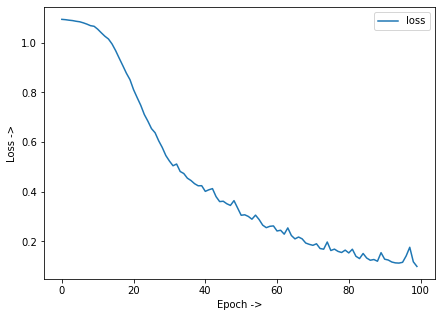

Hidden Neurons =>  44
Accuracy =>  0.94166666


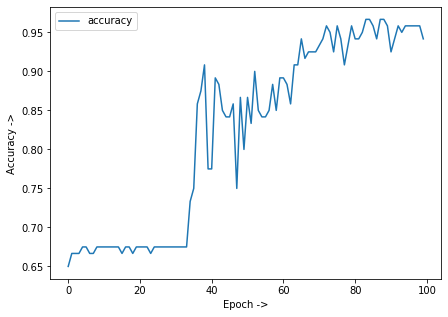

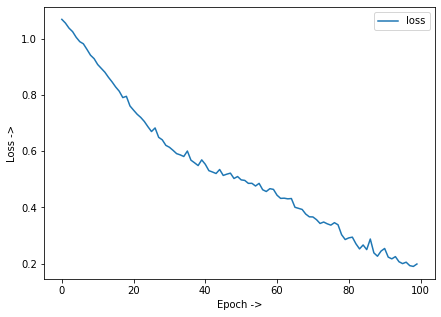

Hidden Neurons =>  45
Accuracy =>  0.975


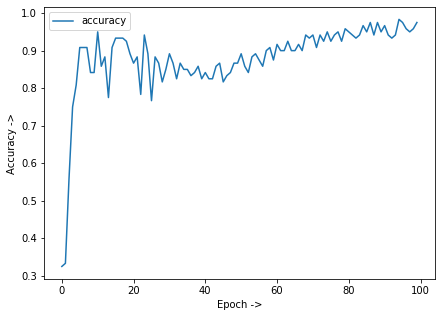

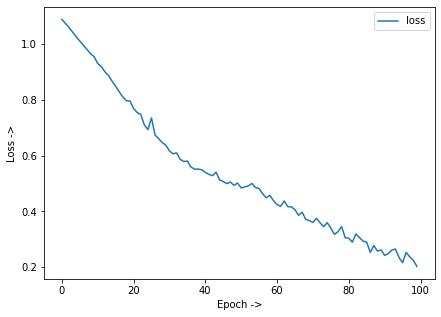

Hidden Neurons =>  46
Accuracy =>  0.98333335


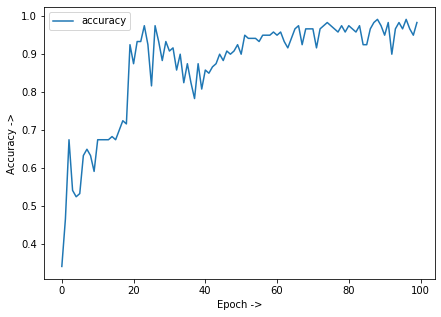

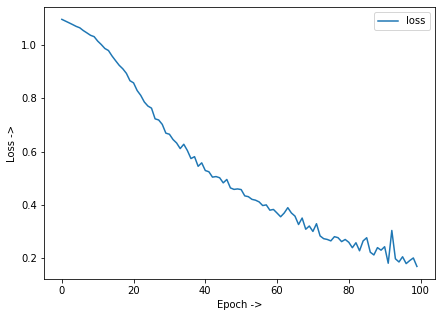

Hidden Neurons =>  47
Accuracy =>  0.925


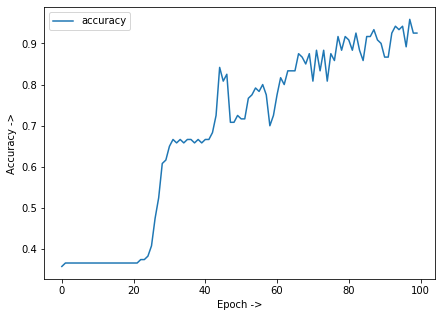

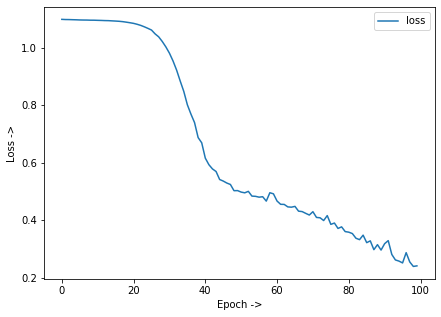

Hidden Neurons =>  48
Accuracy =>  0.95


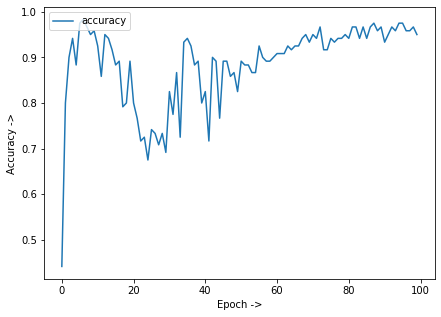

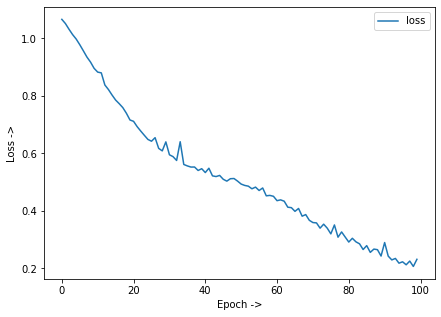

Hidden Neurons =>  49
Accuracy =>  0.975


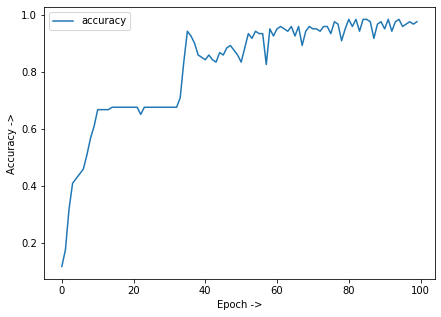

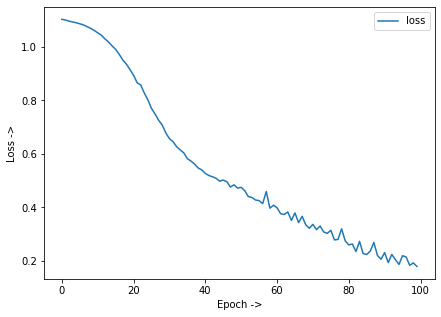

In [22]:
deep_neurons = 50
accuracy_neuron_list = []

for item in range(4,deep_neurons):
    model = Sequential()
    # input dimension is 4 since there are 4 features (input layer)
    model.add(Dense(4, input_dim=4, activation='softmax'))
    # 1st hidden layer
    # initialising the weights using Xavier's Method
    model.add(Dense(item, activation='softmax',kernel_initializer = 'glorot_normal'))
    model.add(BatchNormalization())
    # 2nd layer is output layer
    model.add(Dense(3, activation='softmax'))
    # output layer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    hist = model.fit(X_train,y_train,epochs=100,verbose=0)
    #model.summary()
    
    print("Hidden Neurons => ",item)
    print("Accuracy => ",hist.history.get('accuracy')[-1])
    accuracy_neuron_list.append([item,hist.history.get('accuracy')[-1]])
    plt.figure(figsize=(7,5))
    legend_acc = []
    for item in hist.history.keys():
        if item.split('_')[-1:] == ['accuracy']:
            #print("Accuracy = ",item)
            legend_acc.append(item)
            plt.plot(hist.history[item])
    plt.ylabel('Accuracy ->')
    plt.xlabel('Epoch ->')
    plt.legend(legend_acc, loc='upper left')
    plt.show()

    plt.figure(figsize=(7,5))
    legend_acc = []
    for item in hist.history.keys():
        if item.split('_')[-1:] == ['loss']:
            #print("Accuracy = ",item)
            legend_acc.append(item)
            plt.plot(hist.history[item])
    plt.ylabel('Loss ->')
    plt.xlabel('Epoch ->')
    plt.legend(legend_acc, loc='upper right')
    plt.show()

In [27]:
print(accuracy_neuron_list)

[[4, 0.94166666], [5, 0.98333335], [6, 0.9583333], [7, 0.90833336], [8, 0.94166666], [9, 0.9583333], [10, 0.925], [11, 0.98333335], [12, 0.9583333], [13, 0.9583333], [14, 0.9583333], [15, 0.975], [16, 0.95], [17, 0.9166667], [18, 0.9916667], [19, 0.94166666], [20, 0.975], [21, 0.975], [22, 0.98333335], [23, 0.9583333], [24, 0.975], [25, 0.9], [26, 0.975], [27, 0.9583333], [28, 0.96666664], [29, 0.9166667], [30, 0.95], [31, 0.975], [32, 0.95], [33, 0.90833336], [34, 0.9583333], [35, 0.95], [36, 0.98333335], [37, 0.94166666], [38, 0.95], [39, 0.9583333], [40, 0.9583333], [41, 0.94166666], [42, 0.925], [43, 0.975], [44, 0.94166666], [45, 0.975], [46, 0.98333335], [47, 0.925], [48, 0.95], [49, 0.975]]


In [28]:
#accuracy_neuron_list
print("No. of Hidden Neurons selected => ", 18)

No. of Hidden Neurons selected =>  18


In [29]:
print("Max accuracy got =>",max(second))

Max accuracy got => 0.9916667


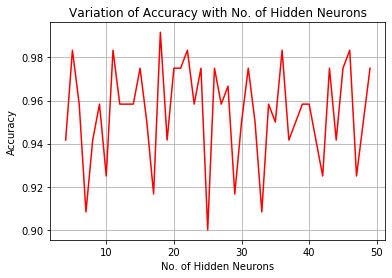

In [30]:
first = [i[0] for i in accuracy_neuron_list]
second = [i[1] for i in accuracy_neuron_list]
fig, ax = plt.subplots()
ax.plot(first, second,color='red')

ax.set(xlabel='No. of Hidden Neurons', ylabel='Accuracy',
       title='Variation of Accuracy with No. of Hidden Neurons')
ax.grid()
plt.show()

#### So we have brute forced and got number of neuron = 18

## c) 
### Take (one of) the case which has best accuracy and employ dropout with different values of dropout rate (say from 0.1 to 0.7). Plot the variation of accuracy versus dropout rate.


Dropout =>  0.1
Accuracy =>  0.69166666


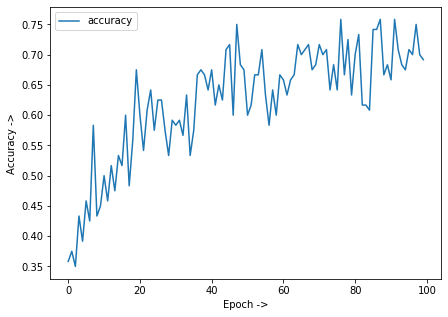

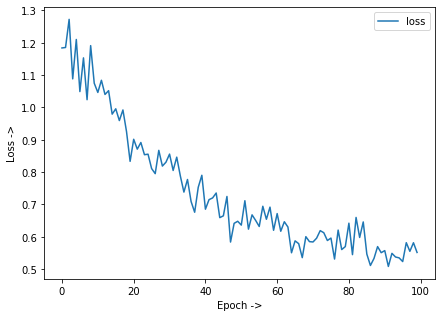

Dropout =>  0.2
Accuracy =>  0.7083333


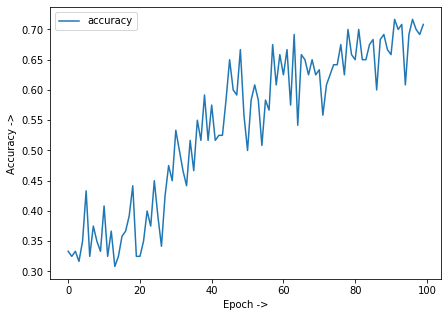

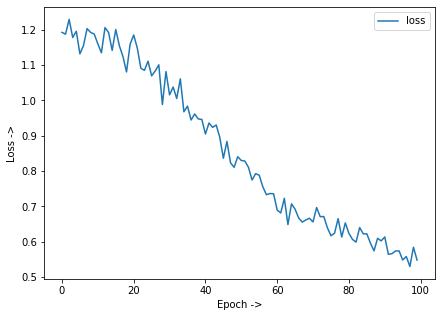

Dropout =>  0.3
Accuracy =>  0.65


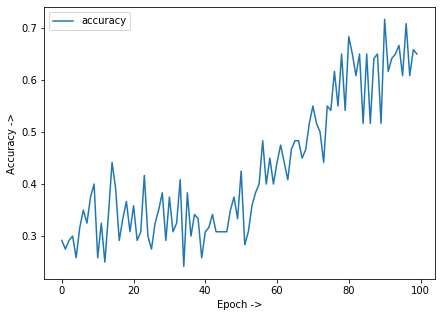

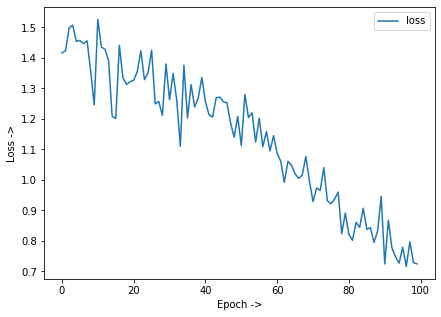

Dropout =>  0.4
Accuracy =>  0.69166666


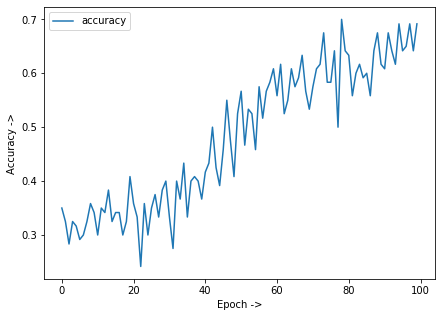

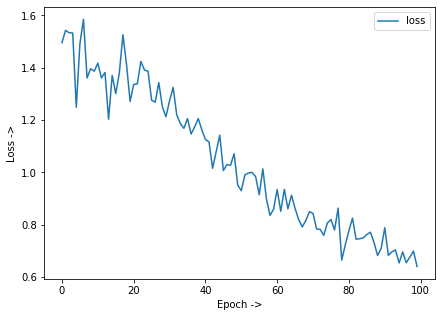

Dropout =>  0.5
Accuracy =>  0.7


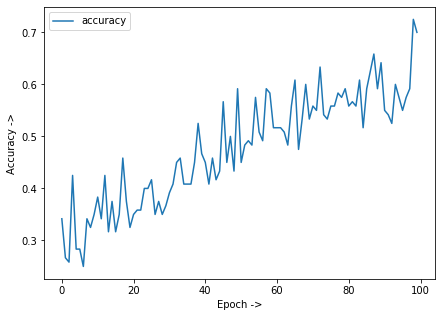

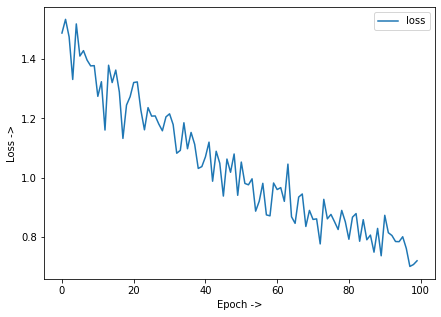

Dropout =>  0.6
Accuracy =>  0.55833334


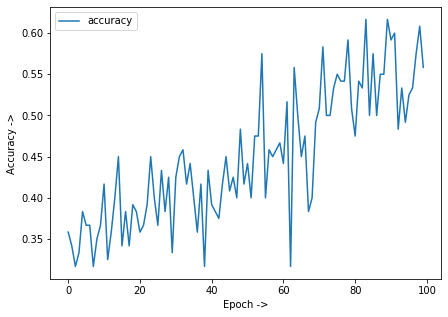

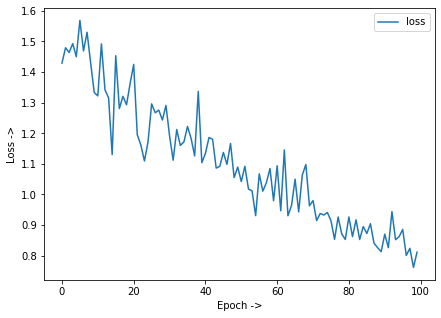

Dropout =>  0.7
Accuracy =>  0.425


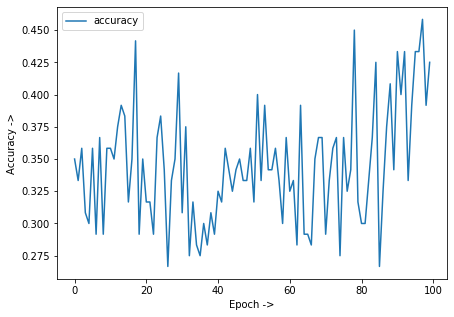

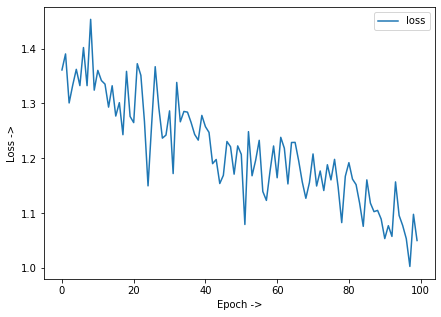

In [31]:
dropout_acc_list = []
for dropout_ in range(1,8):
    dropout = dropout_/10
    #print(dropout)
    #Defining the model 

    # Seq approach
    model = Sequential()
    # input dimension is 4 since there are 4 features (input layer)
    model.add(Dense(4, input_dim=4, activation='softmax'))
    # 1st hidden layer
    # initialising the weights using Xavier's Method
    model.add(Dense(18, activation='softmax',kernel_initializer = 'glorot_normal'))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    # 2nd layer is output layer
    model.add(Dense(3, activation='softmax'))
    # output layer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.summary()
    hist = model.fit(X_train,y_train,epochs=100,verbose=0)
    print("Dropout => ",dropout)
    print("Accuracy => ",hist.history.get('accuracy')[-1])
    dropout_acc_list.append([dropout,hist.history.get('accuracy')[-1]])
    plt.figure(figsize=(7,5))
    legend_acc = []
    for item in hist.history.keys():
        if item.split('_')[-1:] == ['accuracy']:
            #print("Accuracy = ",item)
            legend_acc.append(item)
            plt.plot(hist.history[item])
    plt.ylabel('Accuracy ->')
    plt.xlabel('Epoch ->')
    plt.legend(legend_acc, loc='upper left')
    plt.show()

    plt.figure(figsize=(7,5))
    legend_acc = []
    for item in hist.history.keys():
        if item.split('_')[-1:] == ['loss']:
            #print("Accuracy = ",item)
            legend_acc.append(item)
            plt.plot(hist.history[item])
    plt.ylabel('Loss ->')
    plt.xlabel('Epoch ->')
    plt.legend(legend_acc, loc='upper right')
    plt.show()

In [32]:
dropout_acc_list

[[0.1, 0.69166666],
 [0.2, 0.7083333],
 [0.3, 0.65],
 [0.4, 0.69166666],
 [0.5, 0.7],
 [0.6, 0.55833334],
 [0.7, 0.425]]

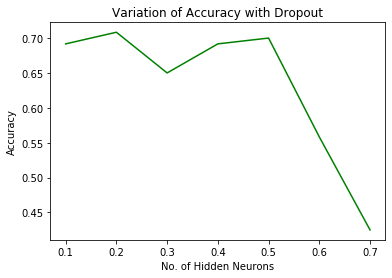

In [34]:
first_d = [i[0] for i in dropout_acc_list]
second_d = [i[1] for i in dropout_acc_list]
fig, ax = plt.subplots()
ax.plot(first_d, second_d,color='green')

ax.set(xlabel='No. of Hidden Neurons', ylabel='Accuracy',
       title='Variation of Accuracy with Dropout')
#ax.grid()
plt.show()

#### Conclusion: Don't add Dropout to such a simple model, it is degrading

## d) 
### Now increase the number of hidden layers (with same no. of neurons) and show the variation of accuracy with respect to the number of hidden layers. You can select the number of neurons as determined best in part b)

Number of hidden layers =>  1
Accuracy =>  0.73333335


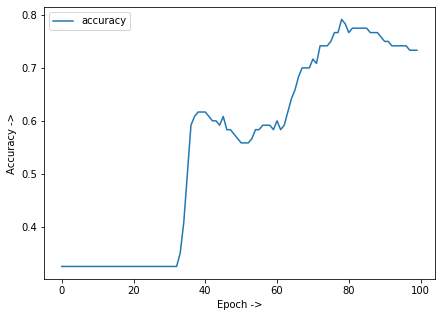

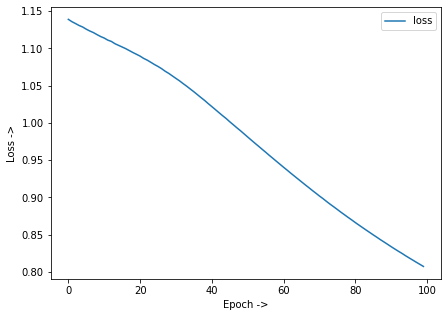

Number of hidden layers =>  2
Accuracy =>  0.98333335


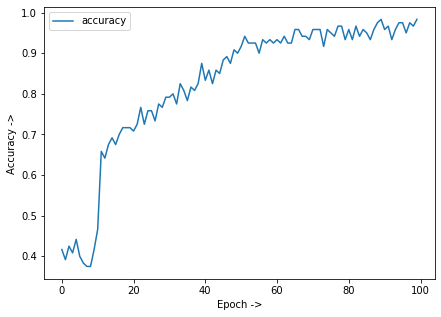

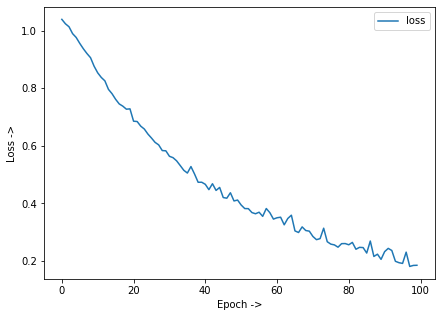

Number of hidden layers =>  3
Accuracy =>  0.975


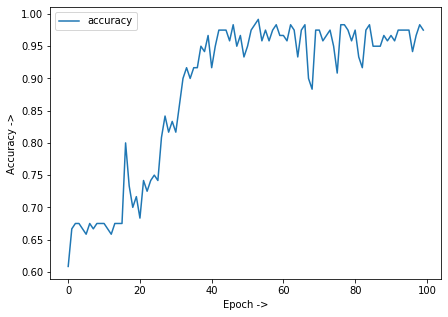

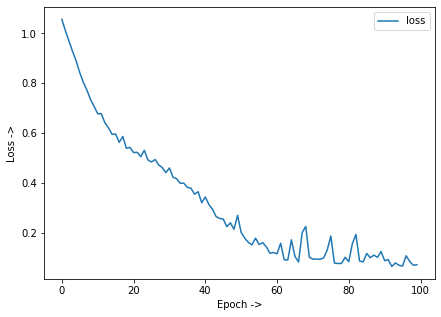

Number of hidden layers =>  4
Accuracy =>  0.96666664


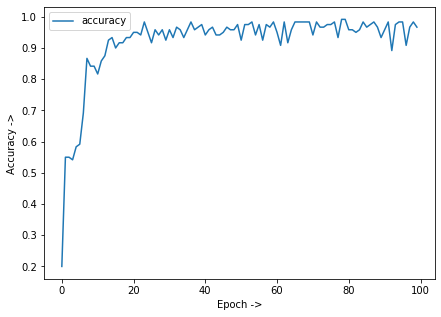

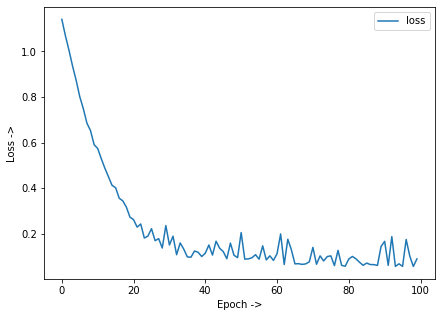

Number of hidden layers =>  5
Accuracy =>  0.9583333


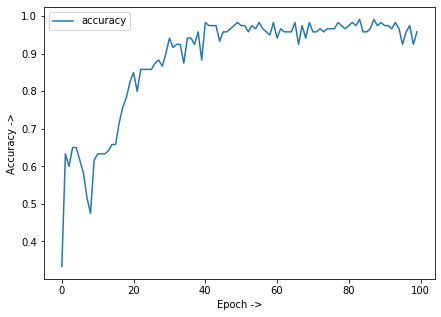

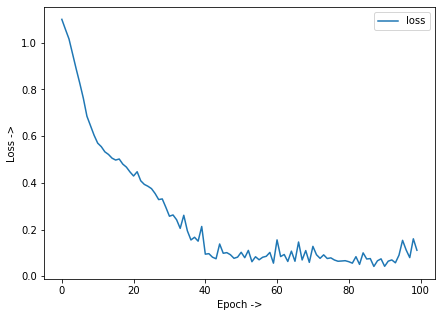

Number of hidden layers =>  6
Accuracy =>  0.9583333


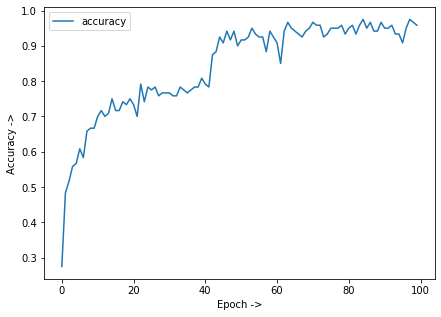

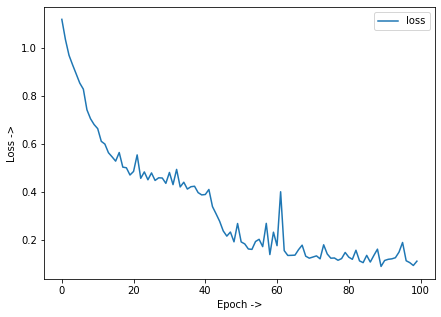

Number of hidden layers =>  7
Accuracy =>  0.98333335


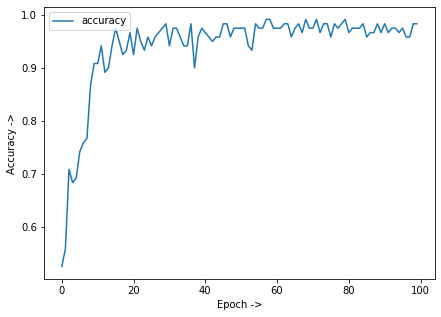

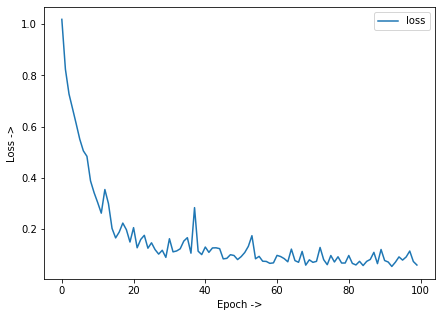

In [35]:
hiddenlayer_acc_list = []
for hidden_layer in range(1,8):
    #dropout = dropout_/10
    #print(dropout)
    #Defining the model 

    # Seq approach
    model = Sequential()
    # input dimension is 4 since there are 4 features (input layer)
    model.add(Dense(4, input_dim=4, activation='softmax'))
    # add hidden layers
    for layer_s in range(1,hidden_layer):
        # 42 is the no. of neurons determined in part (b) 
        # -> the best (though the accuracy curve is not so smooth)
        model.add(Dense(18, activation='softmax',kernel_initializer = 'glorot_normal'))
        #model.add(Dropout(dropout))
        model.add(BatchNormalization())
    # 2nd layer is output layer
    model.add(Dense(3, activation='softmax'))
    # output layer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.summary()
    hist = model.fit(X_train,y_train,epochs=100,verbose=0)
    print("Number of hidden layers => ",hidden_layer)
    print("Accuracy => ",hist.history.get('accuracy')[-1])
    hiddenlayer_acc_list.append([hidden_layer,hist.history.get('accuracy')[-1]])
    plt.figure(figsize=(7,5))
    legend_acc = []
    for item in hist.history.keys():
        if item.split('_')[-1:] == ['accuracy']:
            #print("Accuracy = ",item)
            legend_acc.append(item)
            plt.plot(hist.history[item])
    plt.ylabel('Accuracy ->')
    plt.xlabel('Epoch ->')
    plt.legend(legend_acc, loc='upper left')
    plt.show()

    plt.figure(figsize=(7,5))
    legend_acc = []
    for item in hist.history.keys():
        if item.split('_')[-1:] == ['loss']:
            #print("Accuracy = ",item)
            legend_acc.append(item)
            plt.plot(hist.history[item])
    plt.ylabel('Loss ->')
    plt.xlabel('Epoch ->')
    plt.legend(legend_acc, loc='upper right')
    plt.show()

In [39]:
hiddenlayer_acc_list

[[1, 0.73333335],
 [2, 0.98333335],
 [3, 0.975],
 [4, 0.96666664],
 [5, 0.9583333],
 [6, 0.9583333],
 [7, 0.98333335]]

In [42]:
max([i[1] for i in hiddenlayer_acc_list])

0.98333335

In [43]:
#accuracy_neuron_list
print("No. of hidden Layers selected => ", 2, " Since, we should select the simple one from Occam's Rasor ")

No. of hidden Layers selected =>  2  Since, we should select the simple one from Occam's Rasor 


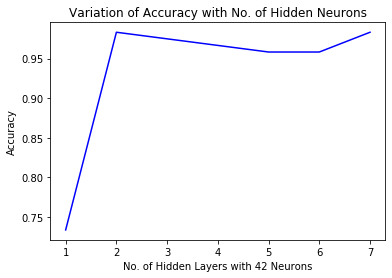

In [44]:
first_d = [i[0] for i in hiddenlayer_acc_list]
second_d = [i[1] for i in hiddenlayer_acc_list]
fig, ax = plt.subplots()
ax.plot(first_d, second_d,color='blue')

ax.set(xlabel='No. of Hidden Layers with 42 Neurons', ylabel='Accuracy',
       title='Variation of Accuracy with No. of Hidden Neurons')
#ax.grid()
plt.show()

## e) 
### Using the setting as determined best in part b), train the model with a few different optimization algorithms (with default settings) and print the accuracy from each case. You may try adam, adagrad, adadelta.

#### With Adam

In [45]:
model = Sequential()
# input dimension is 4 since there are 4 features (input layer)
model.add(Dense(4, input_dim=4, activation='softmax'))
# 1st hidden layer
# initialising the weights using Xavier's Method
model.add(Dense(18, activation='softmax',kernel_initializer = 'glorot_normal'))
# model.add(Dropout(dropout))
model.add(BatchNormalization())
# 2nd layer is output layer
model.add(Dense(3, activation='softmax'))
# output layer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()
hist = model.fit(X_train,y_train,epochs=100,verbose=1)
#print("Dropout => ",dropout)

Epoch 1/100
120/120 [==============================] - 2s 13ms/step - loss: 1.1004 - accuracy: 0.3750
Epoch 2/100
120/120 [==============================] - 0s 342us/step - loss: 1.0739 - accuracy: 0.4000
Epoch 3/100
120/120 [==============================] - 0s 302us/step - loss: 1.0461 - accuracy: 0.4667
Epoch 4/100
120/120 [==============================] - 0s 387us/step - loss: 1.0245 - accuracy: 0.4333
Epoch 5/100
120/120 [==============================] - 0s 623us/step - loss: 0.9946 - accuracy: 0.5500
Epoch 6/100
120/120 [==============================] - 0s 363us/step - loss: 0.9751 - accuracy: 0.5750
Epoch 7/100
120/120 [==============================] - 0s 303us/step - loss: 0.9532 - accuracy: 0.6083
Epoch 8/100
120/120 [==============================] - 0s 341us/step - loss: 0.9318 - accuracy: 0.6333
Epoch 9/100
120/120 [==============================] - 0s 401us/step - loss: 0.9131 - accuracy: 0.6167
Epoch 10/100
120/120 [==============================] - 0s 146us/step - lo

Accuracy =>  0.96666664


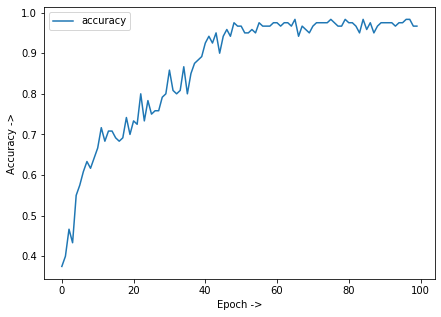

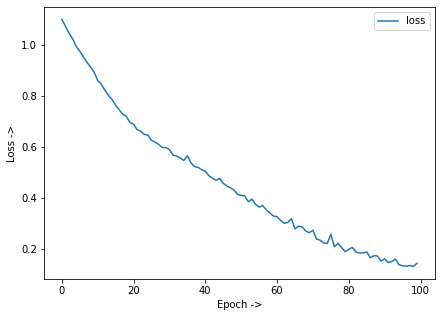

In [46]:
print("Accuracy => ",hist.history.get('accuracy')[-1])
#dropout_acc_list.append([dropout,hist.history.get('accuracy')[-1]])
plt.figure(figsize=(7,5))
legend_acc = []
for item in hist.history.keys():
    if item.split('_')[-1:] == ['accuracy']:
        #print("Accuracy = ",item)
        legend_acc.append(item)
        plt.plot(hist.history[item])
plt.ylabel('Accuracy ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper left')
plt.show()

plt.figure(figsize=(7,5))
legend_acc = []
for item in hist.history.keys():
    if item.split('_')[-1:] == ['loss']:
        #print("Accuracy = ",item)
        legend_acc.append(item)
        plt.plot(hist.history[item])
plt.ylabel('Loss ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper right')
plt.show()

#### With Adagrad

In [47]:
model = Sequential()
# input dimension is 4 since there are 4 features (input layer)
model.add(Dense(4, input_dim=4, activation='softmax'))
# 1st hidden layer
# initialising the weights using Xavier's Method
model.add(Dense(18, activation='softmax',kernel_initializer = 'glorot_normal'))
# model.add(Dropout(dropout))
model.add(BatchNormalization())
# 2nd layer is output layer
model.add(Dense(3, activation='softmax'))
# output layer
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
#model.summary()
hist = model.fit(X_train,y_train,epochs=100,verbose=1)
#print("Dropout => ",dropout)

Epoch 1/100
120/120 [==============================] - 1s 9ms/step - loss: 1.0954 - accuracy: 0.4500
Epoch 2/100
120/120 [==============================] - 0s 272us/step - loss: 1.0861 - accuracy: 0.3667
Epoch 3/100
120/120 [==============================] - 0s 778us/step - loss: 1.0749 - accuracy: 0.3750
Epoch 4/100
120/120 [==============================] - 0s 831us/step - loss: 1.0535 - accuracy: 0.4500
Epoch 5/100
120/120 [==============================] - 0s 370us/step - loss: 1.0224 - accuracy: 0.6417
Epoch 6/100
120/120 [==============================] - 0s 425us/step - loss: 0.9774 - accuracy: 0.6667
Epoch 7/100
120/120 [==============================] - 0s 541us/step - loss: 0.9256 - accuracy: 0.6583
Epoch 8/100
120/120 [==============================] - 0s 716us/step - loss: 0.8592 - accuracy: 0.7083
Epoch 9/100
120/120 [==============================] - 0s 326us/step - loss: 0.7968 - accuracy: 0.8000
Epoch 10/100
120/120 [==============================] - 0s 252us/step - los

Accuracy =>  0.9583333


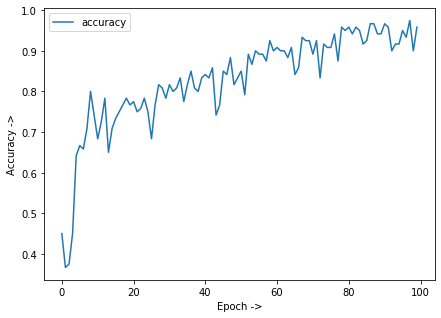

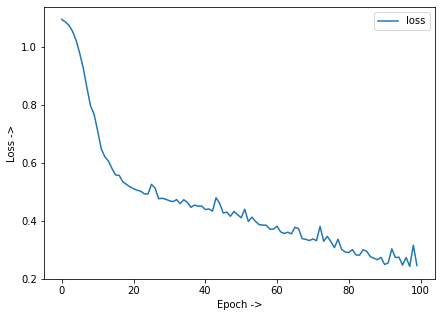

In [48]:
print("Accuracy => ",hist.history.get('accuracy')[-1])
#dropout_acc_list.append([dropout,hist.history.get('accuracy')[-1]])
plt.figure(figsize=(7,5))
legend_acc = []
for item in hist.history.keys():
    if item.split('_')[-1:] == ['accuracy']:
        #print("Accuracy = ",item)
        legend_acc.append(item)
        plt.plot(hist.history[item])
plt.ylabel('Accuracy ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper left')
plt.show()

plt.figure(figsize=(7,5))
legend_acc = []
for item in hist.history.keys():
    if item.split('_')[-1:] == ['loss']:
        #print("Accuracy = ",item)
        legend_acc.append(item)
        plt.plot(hist.history[item])
plt.ylabel('Loss ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper right')
plt.show()

#### With Adadelta

In [50]:
model = Sequential()
# input dimension is 4 since there are 4 features (input layer)
model.add(Dense(4, input_dim=4, activation='softmax'))
# 1st hidden layer
# initialising the weights using Xavier's Method
model.add(Dense(18, activation='softmax',kernel_initializer = 'glorot_normal'))
# model.add(Dropout(dropout))
model.add(BatchNormalization())
# 2nd layer is output layer
model.add(Dense(3, activation='softmax'))
# output layer
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
#model.summary()
hist = model.fit(X_train,y_train,epochs=100,verbose=1)
#print("Dropout => ",dropout)

Epoch 1/100
120/120 [==============================] - 1s 11ms/step - loss: 1.1975 - accuracy: 0.0500
Epoch 2/100
120/120 [==============================] - 0s 662us/step - loss: 1.1703 - accuracy: 0.0667
Epoch 3/100
120/120 [==============================] - 0s 505us/step - loss: 1.1354 - accuracy: 0.1500
Epoch 4/100
120/120 [==============================] - 0s 636us/step - loss: 1.1108 - accuracy: 0.4500
Epoch 5/100
120/120 [==============================] - 0s 474us/step - loss: 1.0912 - accuracy: 0.4583
Epoch 6/100
120/120 [==============================] - 0s 669us/step - loss: 1.0737 - accuracy: 0.5000
Epoch 7/100
120/120 [==============================] - 0s 329us/step - loss: 1.0595 - accuracy: 0.5083
Epoch 8/100
120/120 [==============================] - 0s 398us/step - loss: 1.0355 - accuracy: 0.5167
Epoch 9/100
120/120 [==============================] - 0s 693us/step - loss: 1.0238 - accuracy: 0.5000
Epoch 10/100
120/120 [==============================] - 0s 977us/step - lo

120/120 [==============================] - 0s 421us/step - loss: 0.1393 - accuracy: 0.9583
Epoch 80/100
120/120 [==============================] - 0s 399us/step - loss: 0.1187 - accuracy: 0.9833
Epoch 81/100
120/120 [==============================] - 0s 261us/step - loss: 0.1545 - accuracy: 0.9500
Epoch 82/100
120/120 [==============================] - 0s 397us/step - loss: 0.1238 - accuracy: 0.9667
Epoch 83/100
120/120 [==============================] - 0s 340us/step - loss: 0.1225 - accuracy: 0.9667
Epoch 84/100
120/120 [==============================] - 0s 317us/step - loss: 0.1211 - accuracy: 0.9750
Epoch 85/100
120/120 [==============================] - 0s 313us/step - loss: 0.1250 - accuracy: 0.9583
Epoch 86/100
120/120 [==============================] - 0s 249us/step - loss: 0.1131 - accuracy: 0.9833
Epoch 87/100
120/120 [==============================] - 0s 286us/step - loss: 0.0965 - accuracy: 0.9833
Epoch 88/100
120/120 [==============================] - 0s 319us/step - loss:

Accuracy =>  0.975


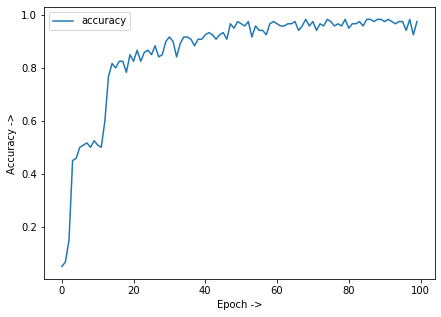

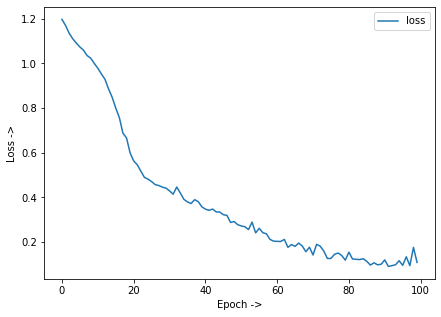

In [51]:
print("Accuracy => ",hist.history.get('accuracy')[-1])
#dropout_acc_list.append([dropout,hist.history.get('accuracy')[-1]])
plt.figure(figsize=(7,5))
legend_acc = []
for item in hist.history.keys():
    if item.split('_')[-1:] == ['accuracy']:
        #print("Accuracy = ",item)
        legend_acc.append(item)
        plt.plot(hist.history[item])
plt.ylabel('Accuracy ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper left')
plt.show()

plt.figure(figsize=(7,5))
legend_acc = []
for item in hist.history.keys():
    if item.split('_')[-1:] == ['loss']:
        #print("Accuracy = ",item)
        legend_acc.append(item)
        plt.plot(hist.history[item])
plt.ylabel('Loss ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper right')
plt.show()

## References

1. https://jamesrledoux.com/code/train_test_split

2. https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

3. https://en.wikipedia.org/wiki/Occam%27s_razor

4. https://keras.io/

5. https://sites.google.com/view/da220-2019-20